In [1]:
import pdb
import math
import re
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import glob
from pgmpy.estimators import PC,HillClimbSearch,BayesianEstimator,MmhcEstimator,K2Score,BicScore,BDeuScore
from pgmpy.sampling import BayesianModelSampling
from pgmpy.models import BayesianModel
from sklearn import manifold

In [2]:
def create_bayes_net(data):
    est = MmhcEstimator(data) # Max-Min Hillclimb algorithm
    skeleton = est.mmpc(significance_level=0.05)
    hc = HillClimbSearch(data)
    best_model = hc.estimate(tabu_length=10, white_list=skeleton.to_directed().edges(), scoring_method=BDeuScore(data))
    edges = best_model.edges()
    nodes = best_model.nodes()
    model = BayesianModel(list(edges))
    model.add_nodes_from(list(nodes))
    model.fit(data,complete_samples_only=False)
    cpds = model.get_cpds()
    return cpds,model


def create_bayes_net_pdag(data):
    est = PC(data);
    skel, seperating_sets = est.build_skeleton(significance_level=0.05)
    print("Undirected edges: ", skel.edges())
    pdag = est.skeleton_to_pdag(skel, seperating_sets)
    print("PDAG edges:       ", pdag.edges())
    model = pdag.to_dag()
    print("DAG edges:        ", model.edges())
    return pdag


def plot_simple_bayes_net(id,model):
    g = nx.DiGraph()
    edges = list(model.edges) 
    edge_labels = [];
    for edge in edges:
        edge_labels = edge_labels + list(edge)
    
    node_labels = sorted(list(set(edge_labels)))
    
    fig = plt.figure(figsize=(8,6))
    
    if len(node_labels) == 0:
        ax = plt.gca()
        ax.text(0,0,'no dependencies',horizontalalignment = 'center')
        ax.margins(0.1)
        plt.axis("off")
    else:  
        deg = 2*math.pi/len(node_labels)
        for t in range(len(node_labels)):
            pos_x = math.cos(t*deg + deg/2)
            pos_y = math.sin(t*deg + deg/2)
            g.add_node(node_labels[t],pos=(pos_x,pos_y))
        g.add_edges_from(model.edges)
        options = {
            "font_size": 8,
            "node_size": 4000,
            "node_color": "white",
            "edgecolors": "black",
            "linewidths": 2,
            "width": 2,
        }
        pos = nx.get_node_attributes(g,'pos')
        nx.draw(g,pos,with_labels = True,**options)
        
    plt.show()
    return fig,g

  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


M23


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


P06


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


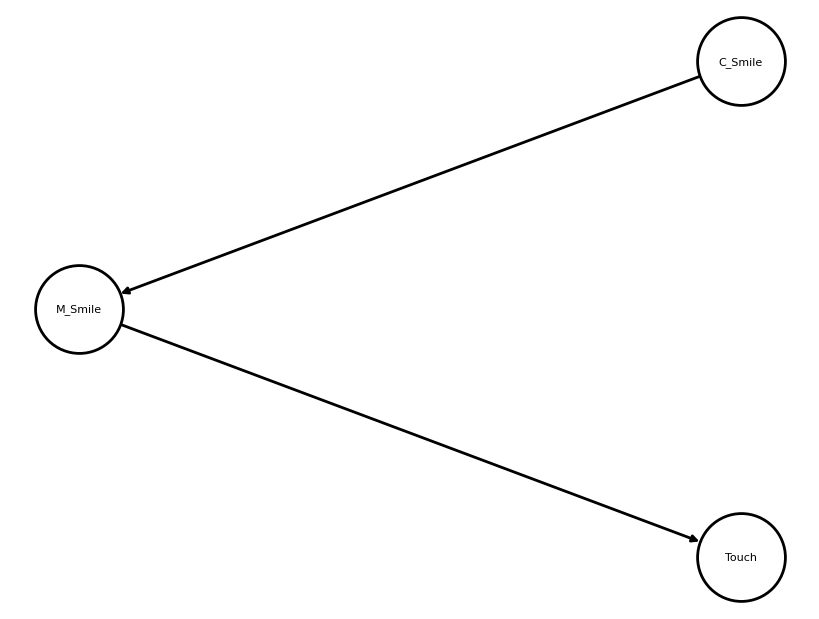

P22


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


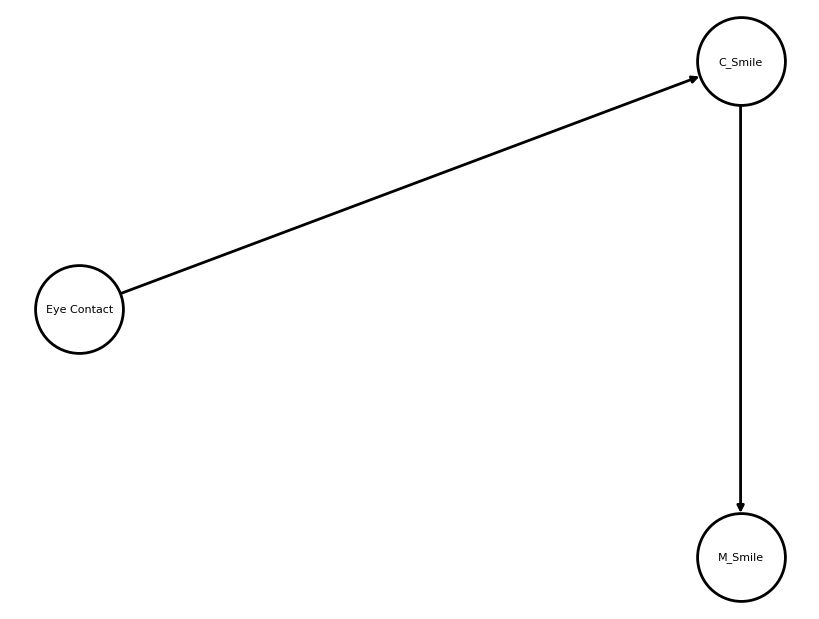

M07


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


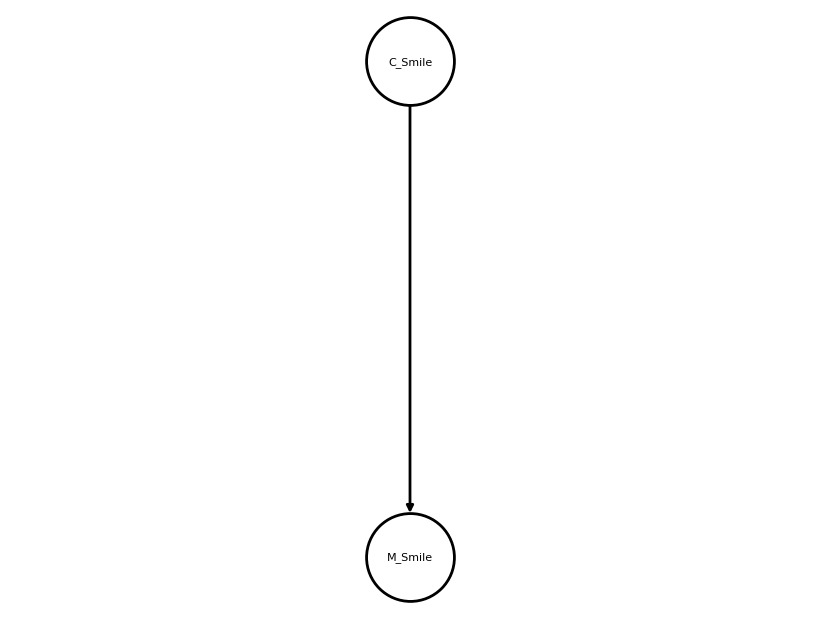

P10


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


M08


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


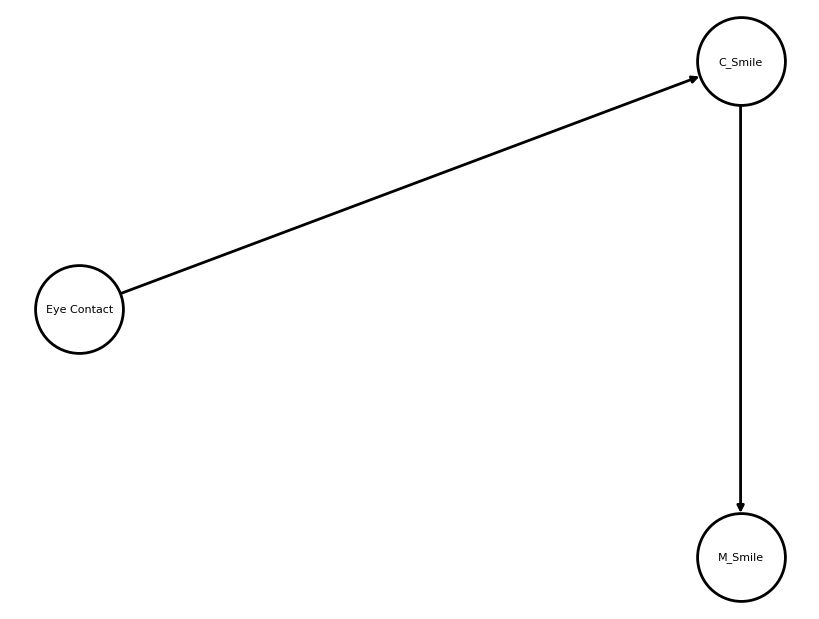

M11


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


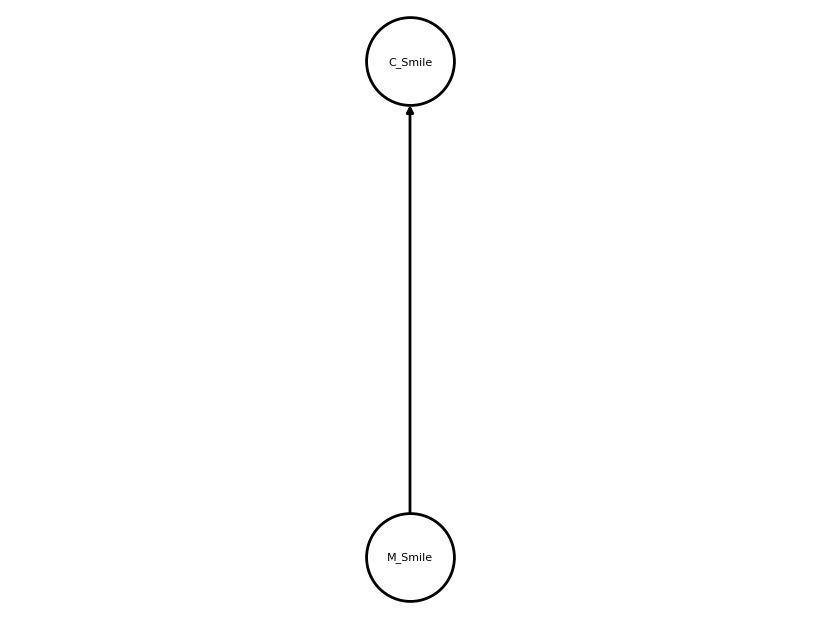

P09


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


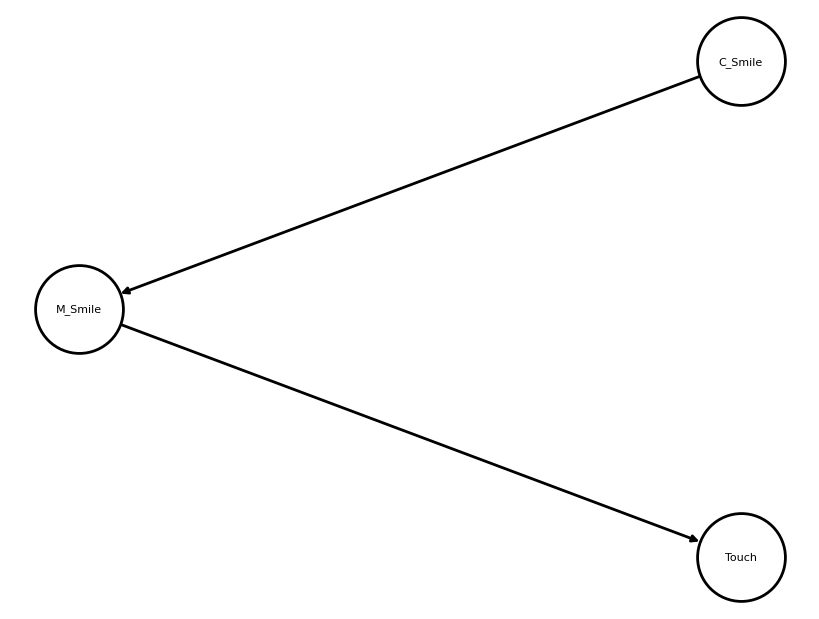

M16


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


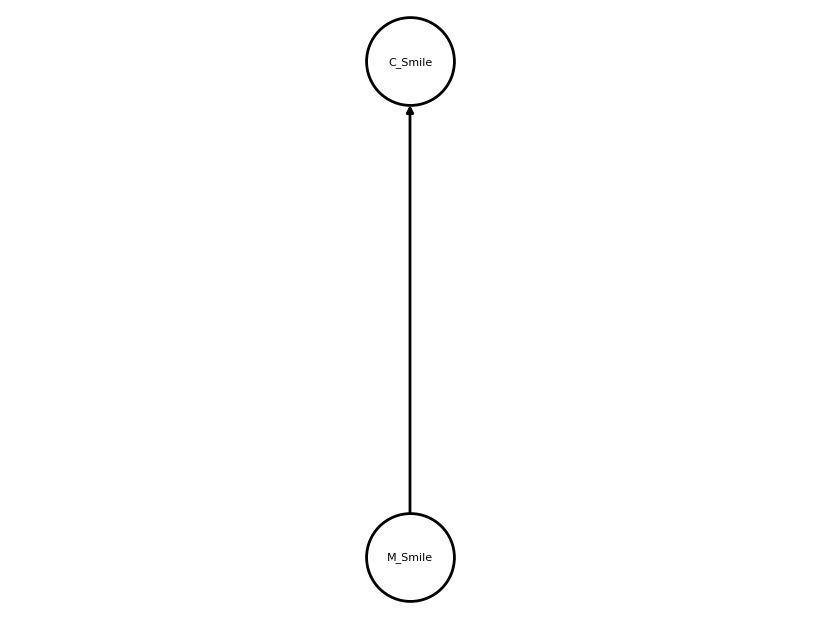

P17


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


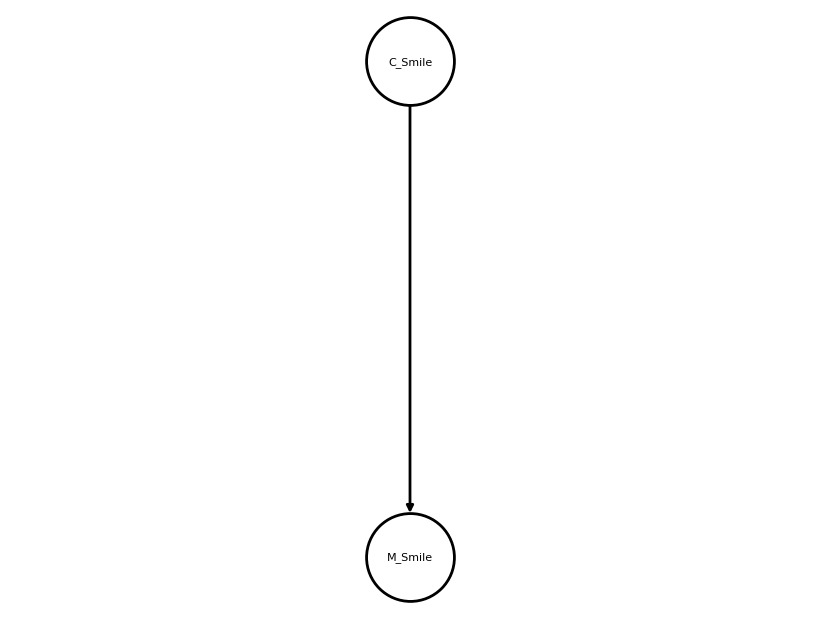

M17


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


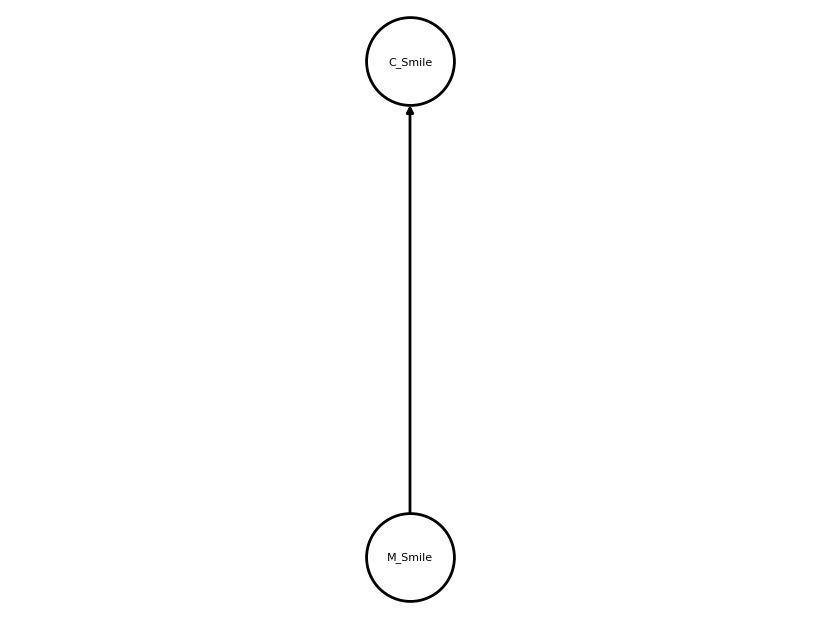

P16


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


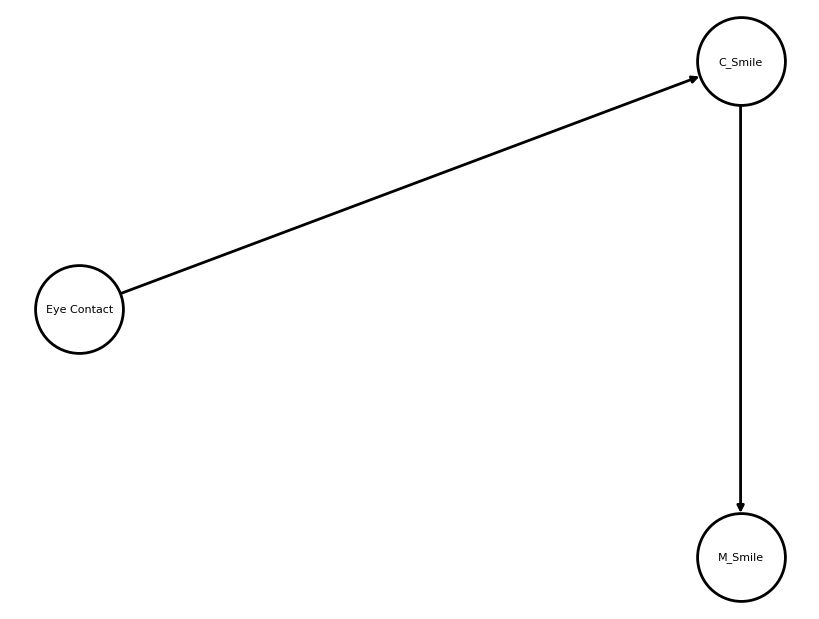

P24


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


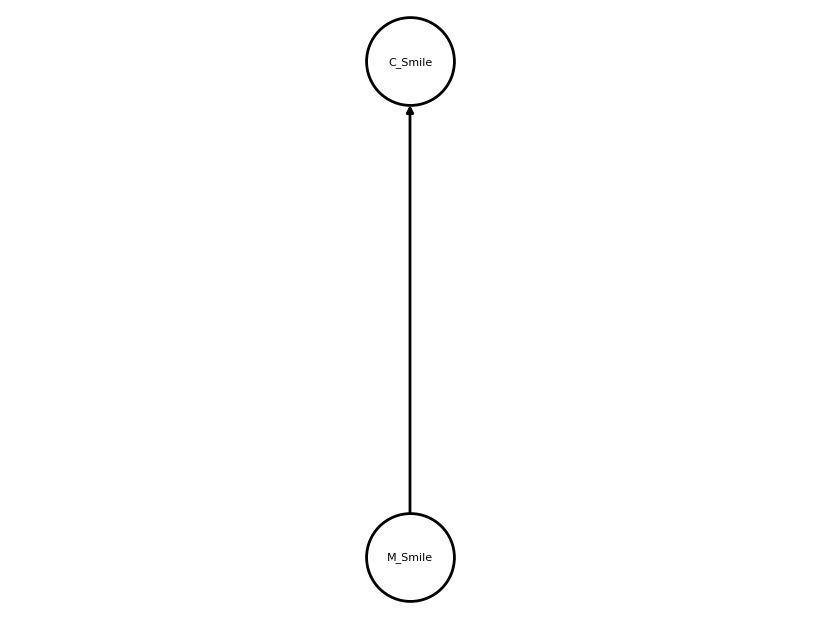

M01


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


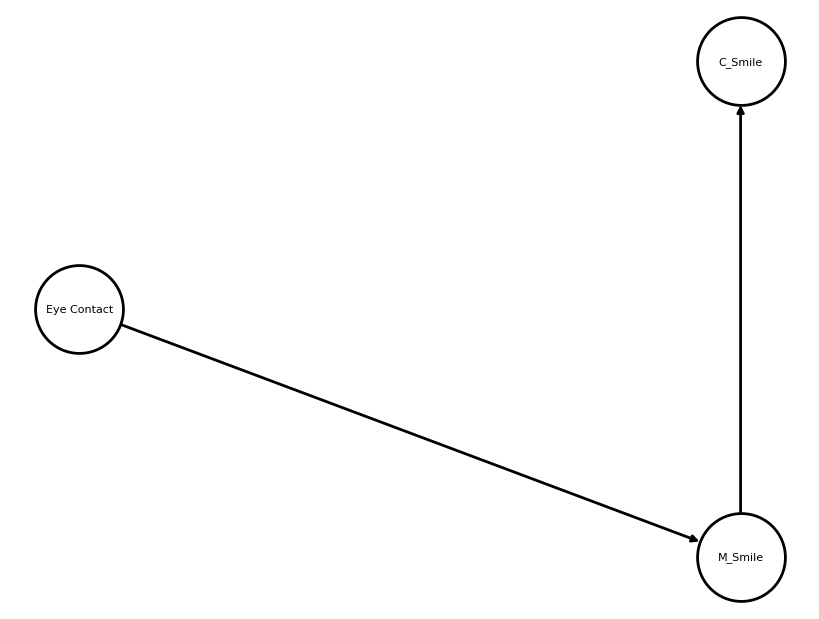

M18


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


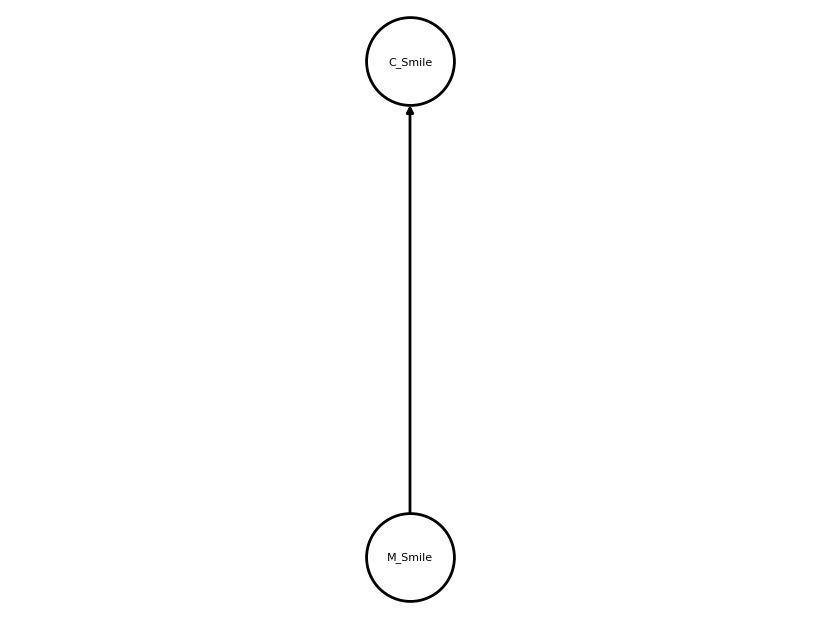

M25


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


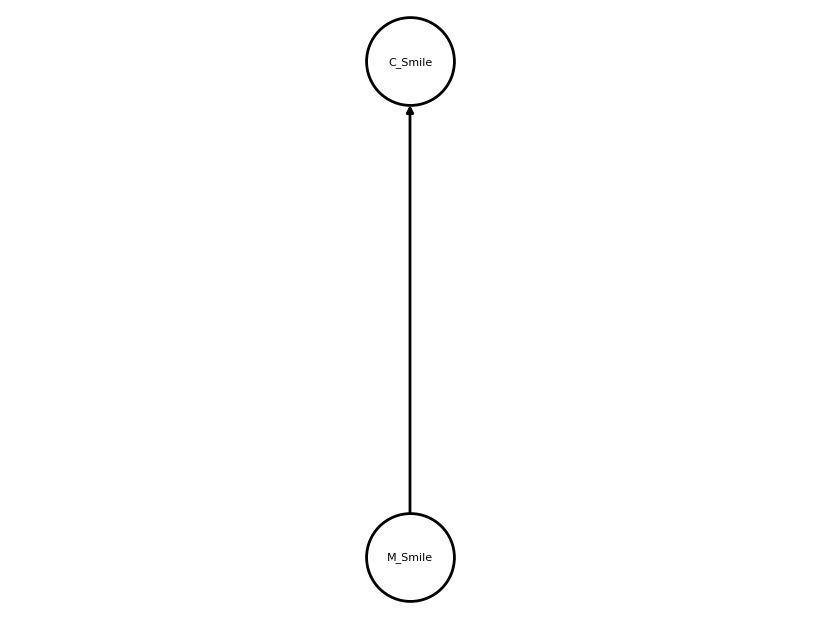

M22


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


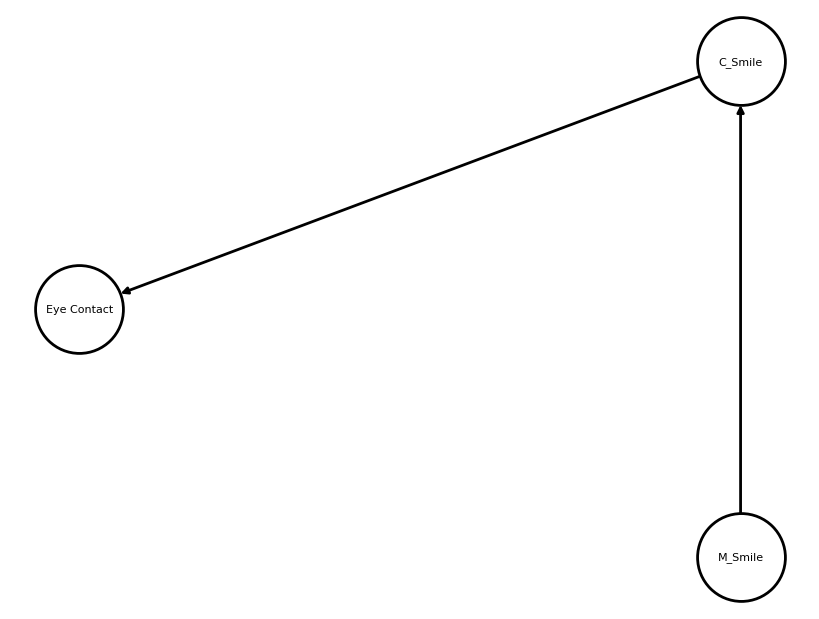

M06


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


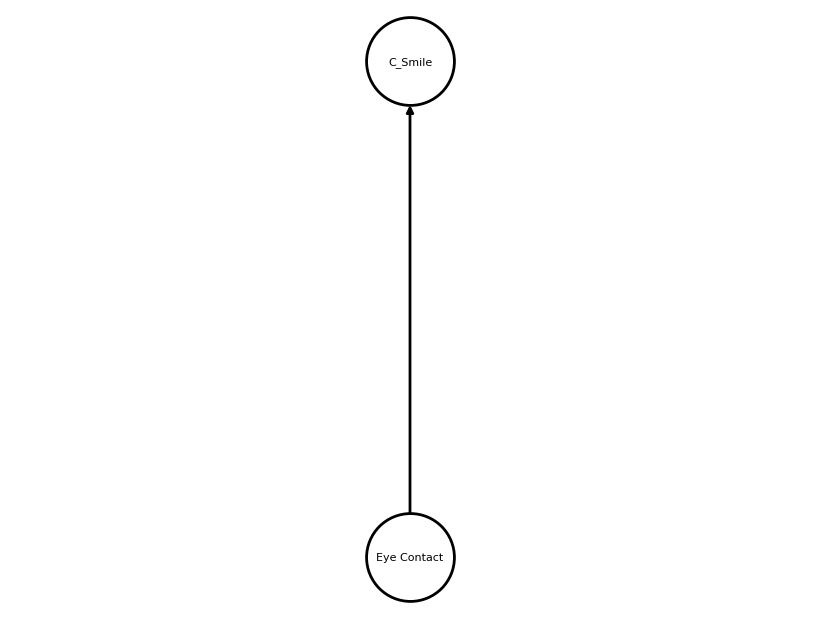

M09


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


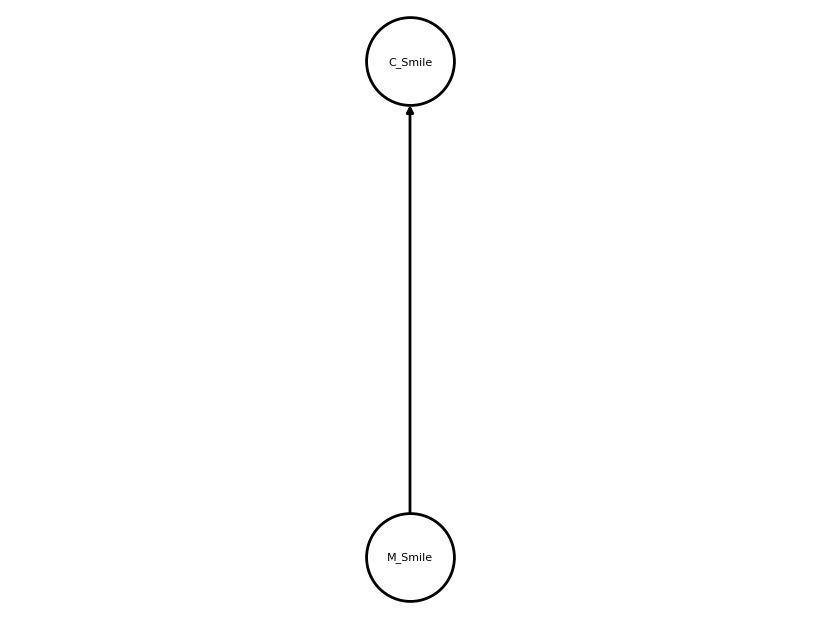

P11


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


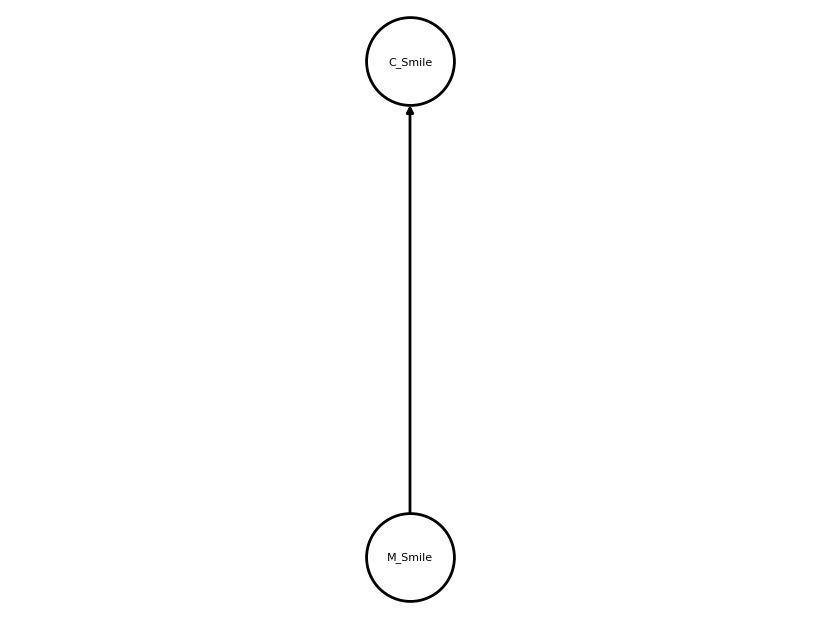

P08


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


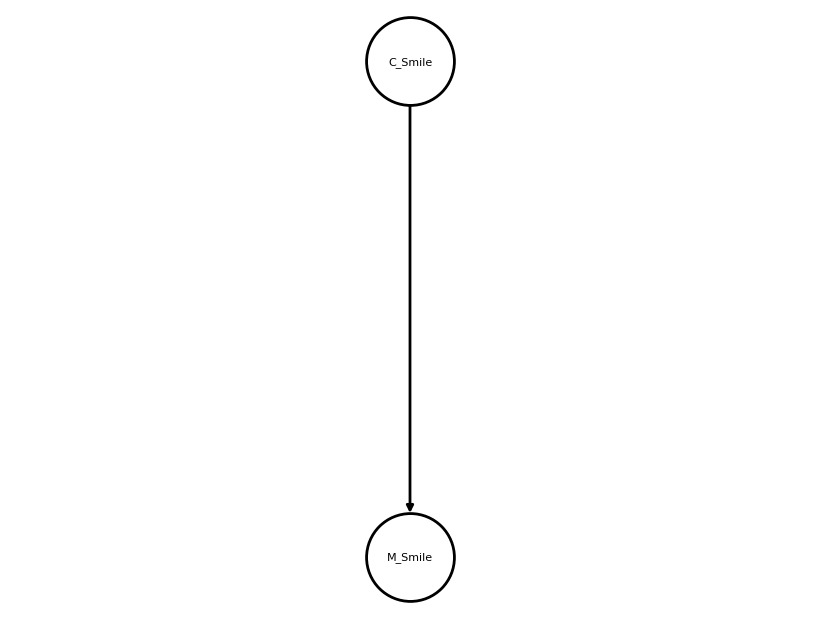

M10


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


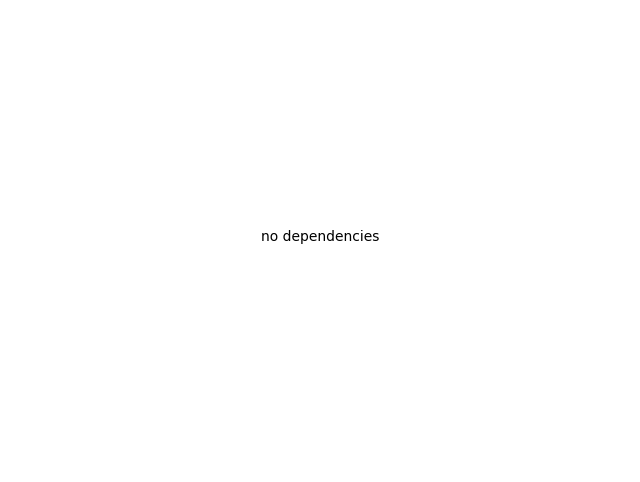

P14


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


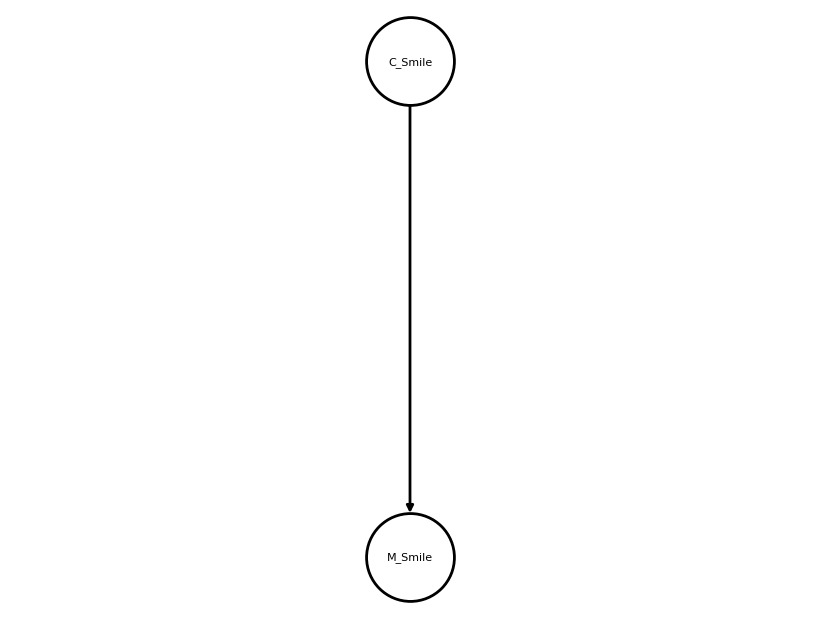

M15


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


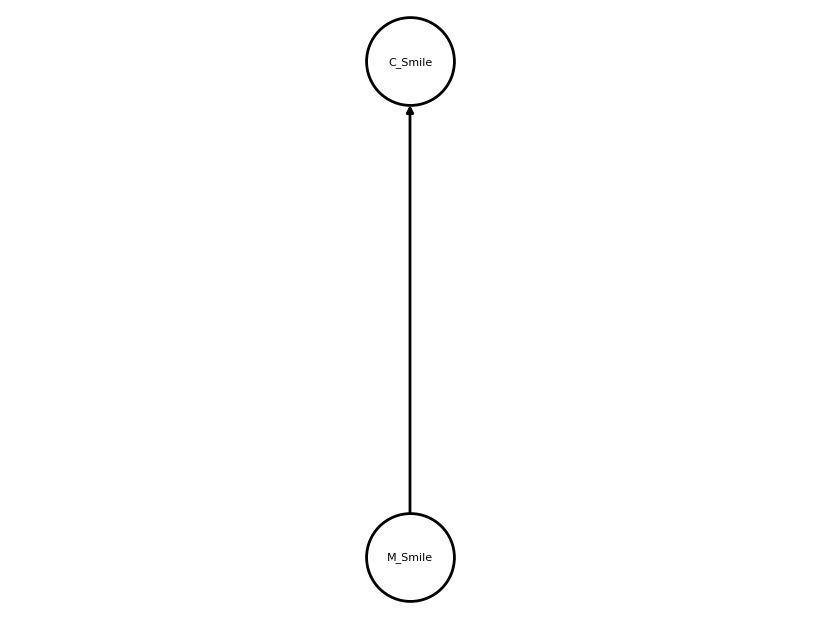

M03


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


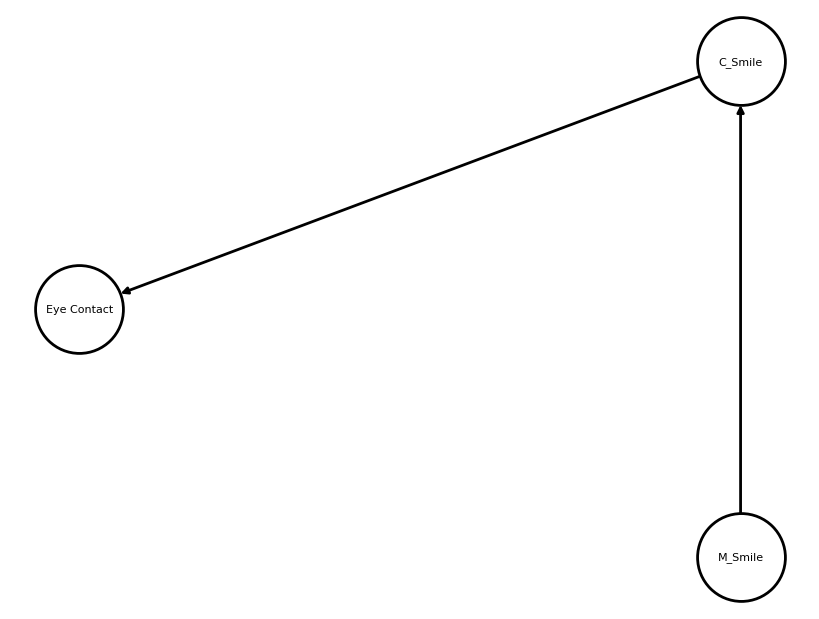

P21


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


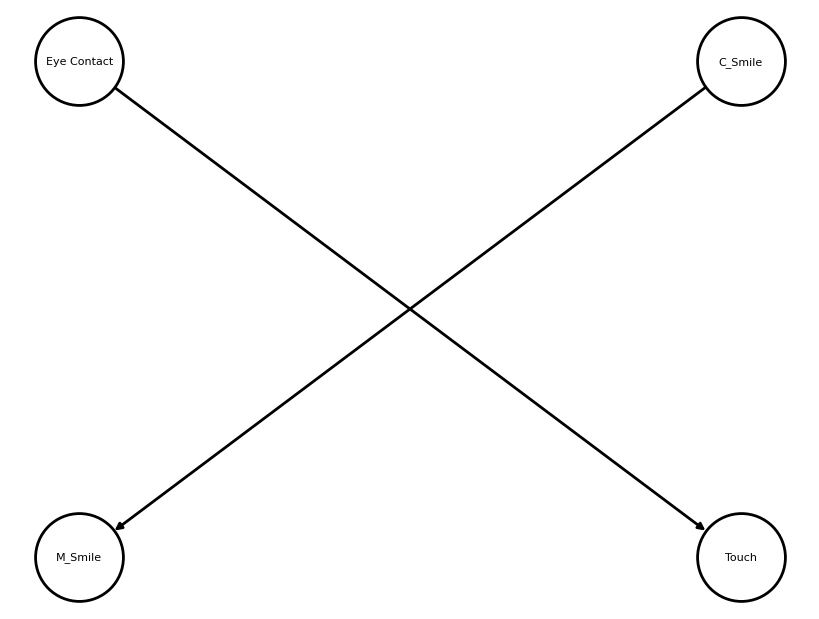

P05


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


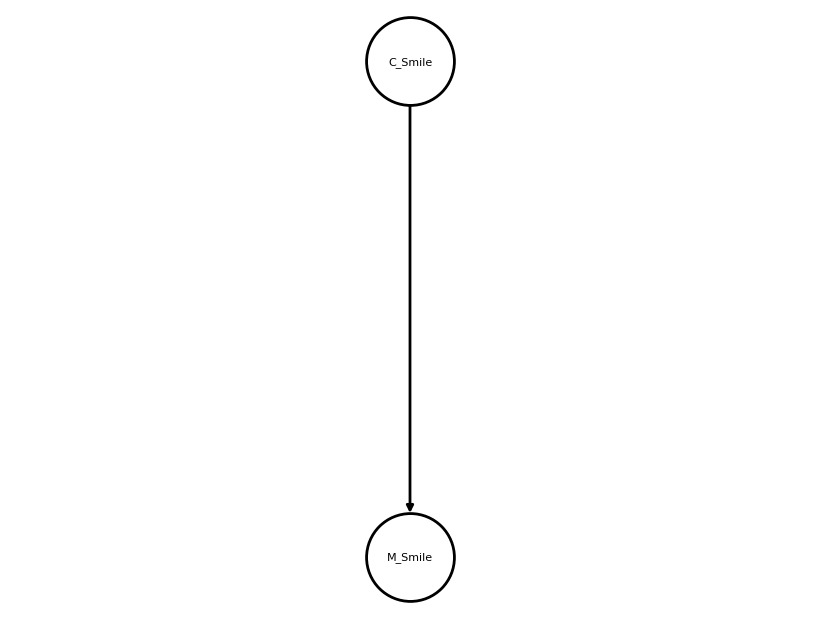

M20


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


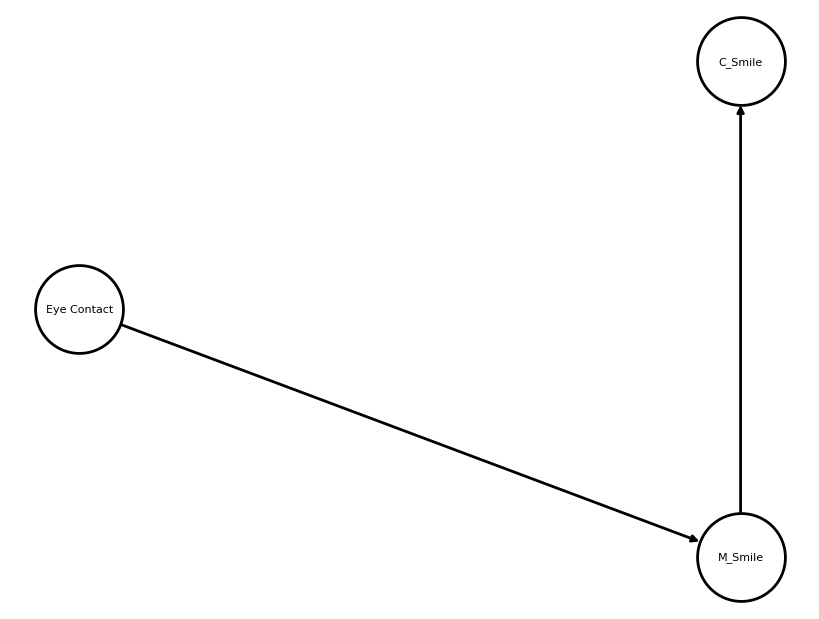

M12


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


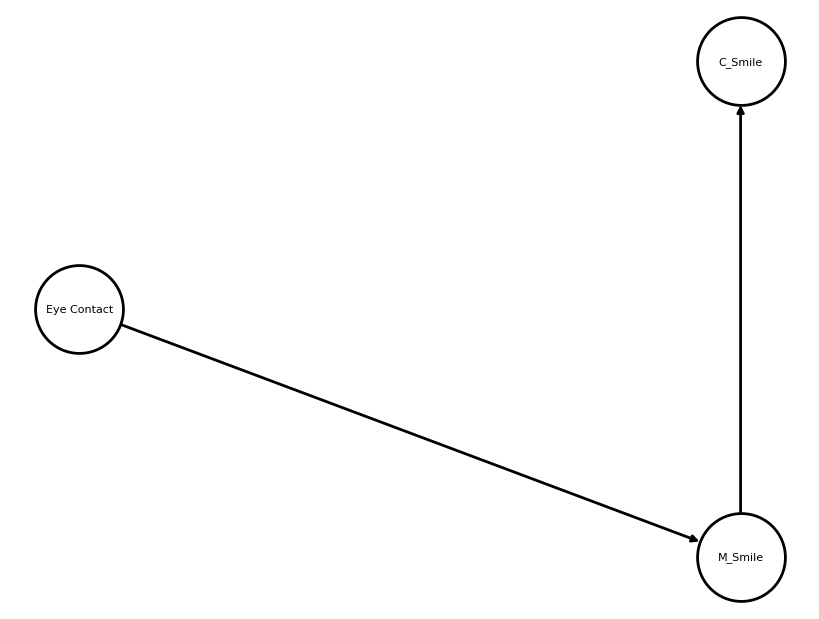

P20


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


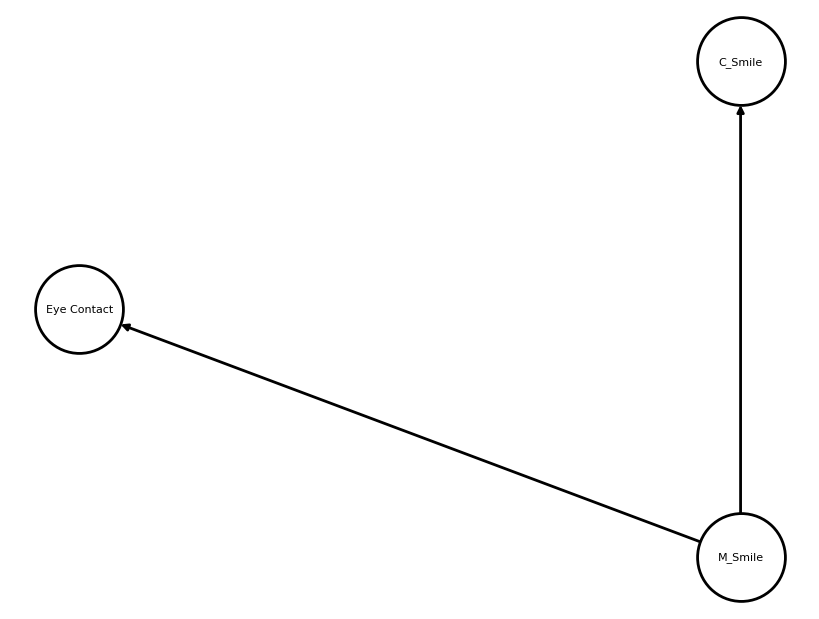

M05


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


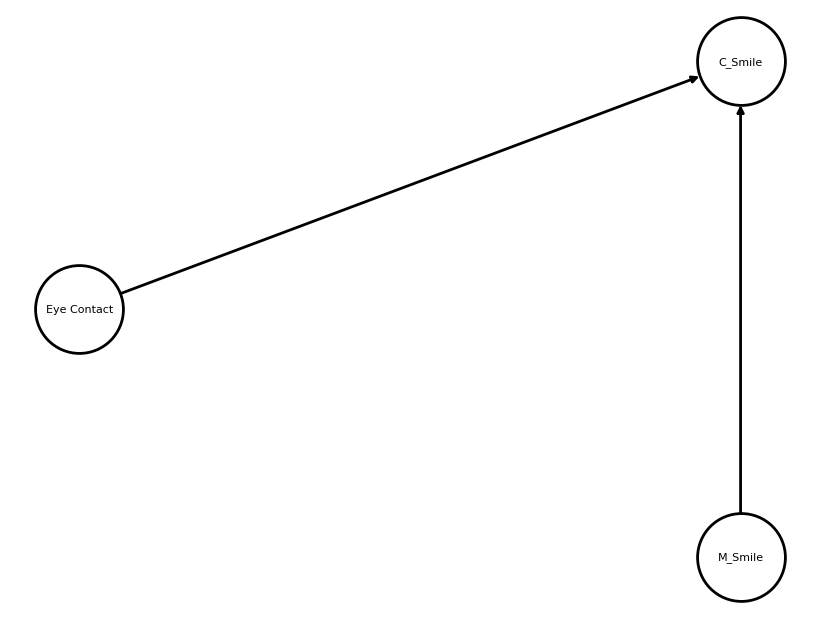

M21


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


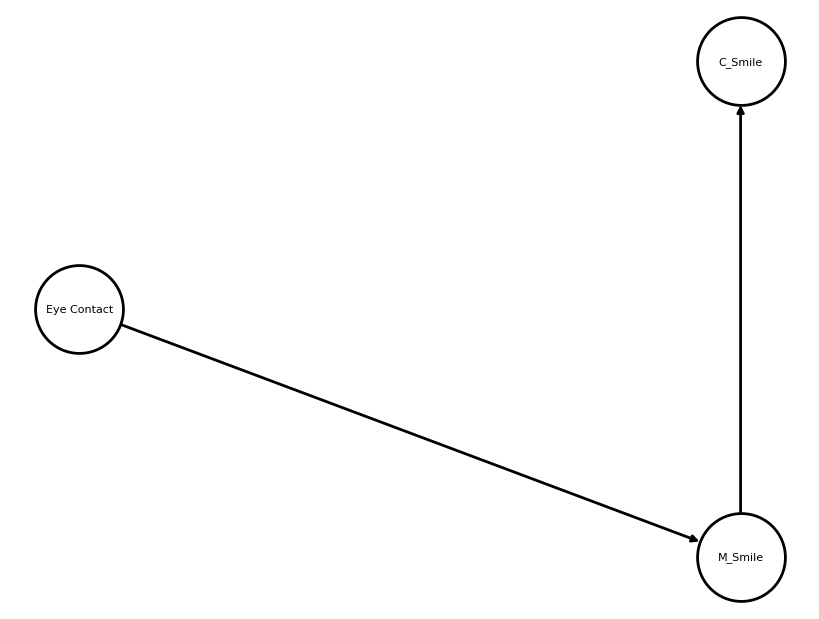

P04


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


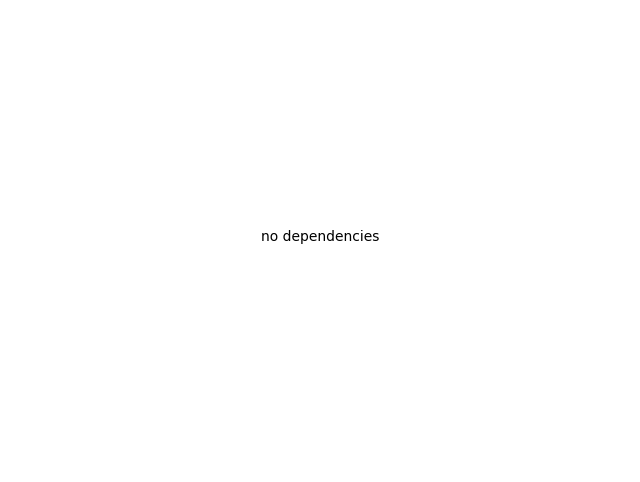

M13


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


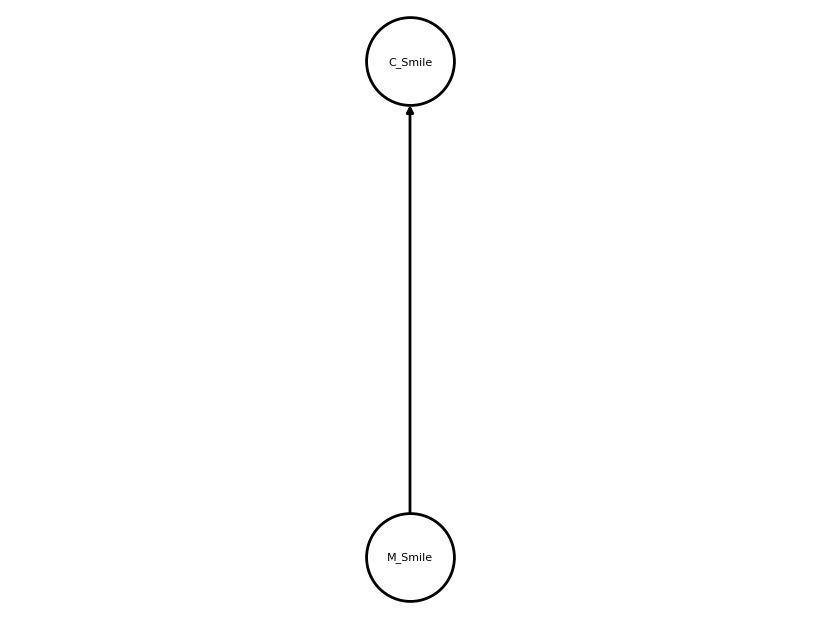

P15


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


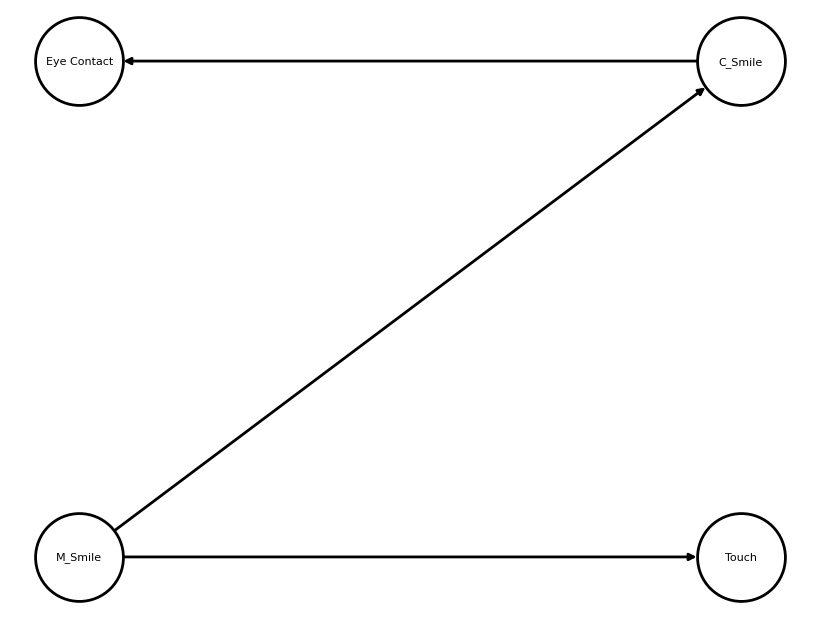

M14


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


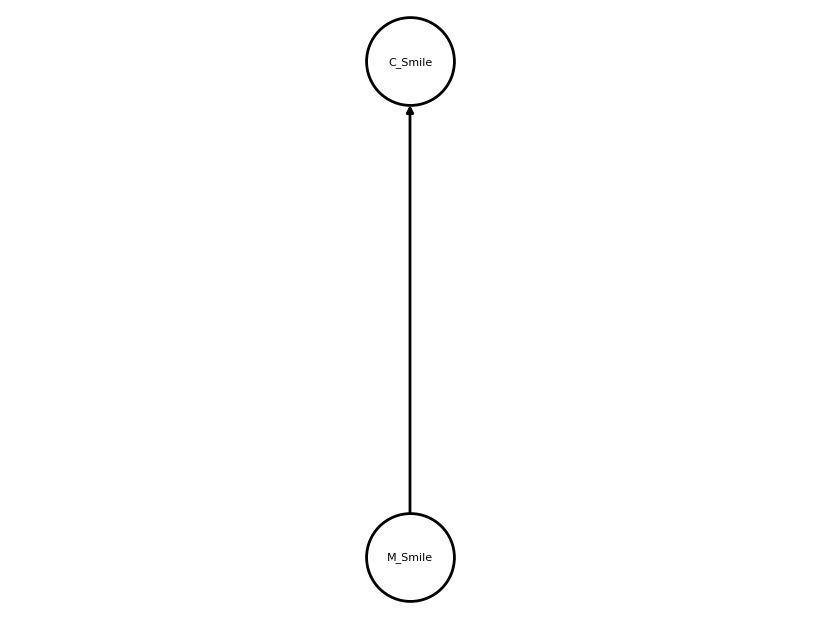

P03


  0%|          | 0/1000000 [00:00<?, ?it/s]

/Users/hirokawa/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


M02


In [4]:
files = glob.glob("../data/all_*.csv")
ptn = '../data/all_([M|P]\d+)_coocurrence.csv'

graphs = dict();

for file in files:
    result = re.match(ptn, file)
    id = result.group(1)
    data = pd.read_csv(file)
    
    cpds,model = create_bayes_net(data)
    fig,g = plot_simple_bayes_net(id,model)
    fig.savefig('../figs/{}_bayesnet.png'.format(id),format='png')
    graphs[id] = g
    print(id)